In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split

In [54]:
data = pd.read_excel('cancer.xlsx', sheet_name='Sheet1',header=None)

In [55]:
x = data. iloc[:, 0:9]

In [31]:
x


,0,1,2,3,4,5,6,7,8
0,0.2,0.1,0.1,0.1,0.2,0.1,0.2,0.1,0.1
1,0.2,0.1,0.1,0.1,0.2,0.1,0.3,0.1,0.1
2,0.5,0.1,0.1,0.1,0.2,0.1,0.2,0.1,0.1
3,0.5,0.4,0.6,0.8,0.4,0.1,0.8,1.0,0.1
4,0.5,0.3,0.3,0.1,0.2,0.1,0.2,0.1,0.1
...,...,...,...,...,...,...,...,...,...
694,0.5,0.1,0.2,0.1,0.2,0.1,0.1,0.1,0.1
695,0.7,0.5,0.6,1.0,0.5,1.0,0.7,0.9,0.4
696,0.6,1.0,1.0,1.0,0.8,1.0,0.7,1.0,0.7
697,0.5,0.7,1.0,1.0,0.5,1.0,1.0,1.0,0.1


In [56]:
y = data[9]

In [57]:
y

0      1
1      1
2      1
3      0
4      1
      ..
694    1
695    0
696    0
697    0
698    1
Name: 9, Length: 699, dtype: int64

In [58]:
print("missing value")
print(data.isna().sum())

missing value
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64


In [59]:
le=LabelEncoder()
encoded_data= data.copy()
for col in encoded_data.columns:
  encoded_data.loc[:,col]=le.fit_transform(encoded_data.loc[:,col])

In [60]:
indep=[]
straight=[]
reverse=[]
data_corr= encoded_data.corr()
for i in range(len(data_corr)-1):
  for j in range(len(data_corr)-1):
    if(data_corr[i][j] > 0.95):
      straight.append([i,j])
    elif(data_corr[i][j] == 0):
      indep.append([i,j])
    elif(data_corr[i][j] < 0):
      reverse.append([i,j])


In [61]:
print("straight columns",straight)
print("independent columns " , indep)
print("reversed columns " , reverse)

straight columns [[0, 0], [1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8]]
independent columns  []
reversed columns  []


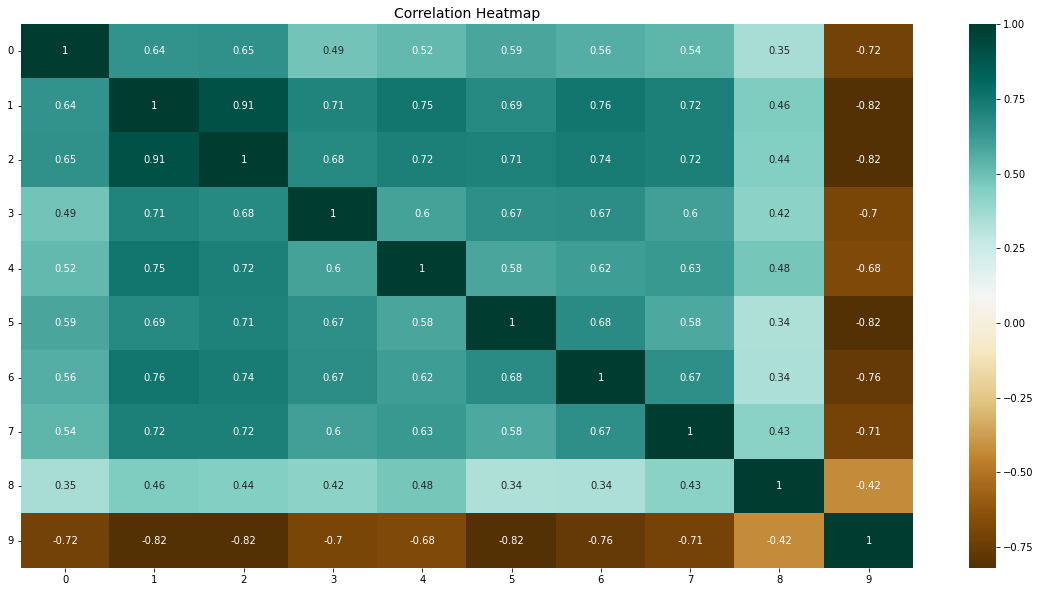

In [62]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,cmap='BrBG')
plt.title('Correlation Heatmap',fontsize=14)
plt.yticks(rotation =0)
plt.show()

In [63]:
X_train, X_test, y_train, y_test = train_test_split(x , y, test_size=0.2, random_state=42)

In [64]:
X_train = X_train.T
y_train = y_train.values.reshape(1, y_train.shape[0])
X_test = X_test.T
y_test = y_test.values.reshape(1, y_test.shape[0])

In [65]:
print ("Train X Shape: ", X_train.shape)
print ("Train Y Shape: ", y_train.shape)
print ("I have m = %d training examples!" % (X_train.shape[1]))

print ('\nTest X Shape: ', X_test.shape)

Train X Shape:  (9, 559)
Train Y Shape:  (1, 559)
I have m = 559 training examples!

Test X Shape:  (9, 140)


In [16]:
# Run one block between this block and next block 
def define_structure(X, Y):
    input_unit = 9 # size of input layer
    hidden_unit = 30 # hidden layer of size 30
    output_unit = Y.shape[0] # size of output layer
    return (input_unit, hidden_unit, output_unit)

In [88]:
def define_structure(X, Y):
    input_unit = 9 # size of input layer
    hidden_unit = 1000 # hidden layer of size 100
    output_unit = Y.shape[0] # size of output layer
    return (input_unit, hidden_unit, output_unit)

In [89]:
(input_unit, hidden_unit, output_unit) = define_structure(X_train, y_train)
print("The size of the input layer is:  = " + str(input_unit))
print("The size of the hidden layer is:  = " + str(hidden_unit))
print("The size of the output layer is:  = " + str(output_unit))

The size of the input layer is:  = 9
The size of the hidden layer is:  = 1000
The size of the output layer is:  = 1


In [90]:
def parameters_initialization(input_unit, hidden_unit, output_unit):
    np.random.seed(2) 
    W1 = np.random.randn(hidden_unit, input_unit)*0.01
    b1 = np.zeros((hidden_unit, 1))
    W2 = np.random.randn(output_unit, hidden_unit)*0.01
    b2 = np.zeros((output_unit, 1))
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [91]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [92]:
def forward_propagation(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    cache = {"Z1": Z1,"A1": A1,"Z2": Z2,"A2": A2}
    
    return A2, cache

In [93]:
def cross_entropy_cost(A2, Y, parameters):
    # number of training example
    m = Y.shape[1] 
    # Compute the cross-entropy cost
    logprobs = np.multiply(np.log(A2), Y) + np.multiply((1-Y), np.log(1 - A2))
    cost = - np.sum(logprobs) / m
    cost = float(np.squeeze(cost))
                                    
    return cost

In [94]:
def backward_propagation(parameters, cache, X, Y):
    #number of training example
    m = X.shape[1]
    
    W1 = parameters['W1']
    W2 = parameters['W2']
    A1 = cache['A1']
    A2 = cache['A2']
   
    dZ2 = A2-Y
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = (1/m) * np.dot(dZ1, X.T) 
    db1 = (1/m)*np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {"dW1": dW1, "db1": db1, "dW2": dW2,"db2": db2}
    return grads

In [95]:
def gradient_descent(parameters, grads, learning_rate = 0.01):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
   
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1, "b1": b1,"W2": W2,"b2": b2}
 
    return parameters
   

In [25]:
# Run one block between this block and next block 
def neural_network_model(X, Y, hidden_unit, num_iterations = 100):
    np.random.seed(3)
    input_unit = define_structure(X, Y)[0]
    output_unit = define_structure(X, Y)[2]
    
    parameters = parameters_initialization(input_unit, hidden_unit, output_unit)
   
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    for i in range(0, num_iterations):
        A2, cache = forward_propagation(X, parameters)
        cost = cross_entropy_cost(A2, Y, parameters)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = gradient_descent(parameters, grads)
        if i % 5 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    return parameters
parameters = neural_network_model(X_train, y_train, 30, num_iterations=100)

Cost after iteration 0: 0.692943
Cost after iteration 5: 0.691407
Cost after iteration 10: 0.689905
Cost after iteration 15: 0.688436
Cost after iteration 20: 0.687000
Cost after iteration 25: 0.685596
Cost after iteration 30: 0.684222
Cost after iteration 35: 0.682878
Cost after iteration 40: 0.681562
Cost after iteration 45: 0.680275
Cost after iteration 50: 0.679015
Cost after iteration 55: 0.677781
Cost after iteration 60: 0.676572
Cost after iteration 65: 0.675389
Cost after iteration 70: 0.674229
Cost after iteration 75: 0.673093
Cost after iteration 80: 0.671979
Cost after iteration 85: 0.670888
Cost after iteration 90: 0.669817
Cost after iteration 95: 0.668767


In [96]:
def neural_network_model(X, Y, hidden_unit, num_iterations =1000):
    np.random.seed(3)
    input_unit = define_structure(X, Y)[0]
    output_unit = define_structure(X, Y)[2]
    
    parameters = parameters_initialization(input_unit, hidden_unit, output_unit)
   
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    for i in range(0, num_iterations):
        A2, cache = forward_propagation(X, parameters)
        cost = cross_entropy_cost(A2, Y, parameters)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = gradient_descent(parameters, grads)
        if i % 5 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    return parameters
parameters = neural_network_model(X_train, y_train,600, num_iterations=1000)

Cost after iteration 0: 0.693369
Cost after iteration 5: 0.691754
Cost after iteration 10: 0.690173
Cost after iteration 15: 0.688624
Cost after iteration 20: 0.687105
Cost after iteration 25: 0.685617
Cost after iteration 30: 0.684158
Cost after iteration 35: 0.682728
Cost after iteration 40: 0.681324
Cost after iteration 45: 0.679947
Cost after iteration 50: 0.678595
Cost after iteration 55: 0.677268
Cost after iteration 60: 0.675965
Cost after iteration 65: 0.674685
Cost after iteration 70: 0.673427
Cost after iteration 75: 0.672191
Cost after iteration 80: 0.670976
Cost after iteration 85: 0.669780
Cost after iteration 90: 0.668603
Cost after iteration 95: 0.667446
Cost after iteration 100: 0.666306
Cost after iteration 105: 0.665183
Cost after iteration 110: 0.664076
Cost after iteration 115: 0.662986
Cost after iteration 120: 0.661911
Cost after iteration 125: 0.660850
Cost after iteration 130: 0.659803
Cost after iteration 135: 0.658770
Cost after iteration 140: 0.657749
Cost af

In [97]:
def prediction(parameters, X):
    A2, cache = forward_propagation(X, parameters)
    predictions = np.round(A2)
    
    return predictions

In [98]:
predictions = prediction(parameters, X_train)
print ('Accuracy Train: %d' % float((np.dot(y_train, predictions.T) + np.dot(1 - y_train, 1 - predictions.T))/float(y_train.size)*100) + '%')
predictions = prediction(parameters, X_test)
print ('Accuracy Test: %d' % float((np.dot(y_test, predictions.T) + np.dot(1 - y_test, 1 - predictions.T))/float(y_test.size)*100) + '%')

Accuracy Train: 94%
Accuracy Test: 95%


**Accuracy train : 66% and Accuracy test : 60% with 30 hidden layer and 100 iterations**


**Accuracy train : 94% and Accuracy test : 95% with 600 hidden layer and 1000 iterations**